## Exercise #1: Which model fits best?

**Description:** by manually adjusting the slope and intercept, try to pick out the best fitting model by eye.

**Duration:** 5 min

First we import some useful libraries, for those unfamiliar, NumPy is a powerful library for array and matrix computations. If you are unfamiliar with the idea of arrays, think about them as extra powerful lists. Additionally, matplotlib is a library used to create light weight visualizations.

In [ ]:
import numpy as np  # import the NumPy library and assign alias `np`
import matplotlib.pyplot as plt  # import pyplot and assign alias `plt`

This hidden block contains the true slope and intercept of the line. As scientists, often times we don't know the true parametes of, it is our job to estimate them to the best of our ability.

No peaking hehe

In [ ]:
#@title
SLOPE_TRUE = np.random.uniform(-4, 4)
INTERCEPT_TRUE = np.random.uniform(-4, 4)

### Defining Our Data

Here we create some artificial independent data, $x$, and create the true corresponding dependent variables given the true slope and intercept.

However, when we deal with these measurements, often times random errors are present. To emulate this, we corrupt our true $y$ with some random error.

In [ ]:
# Creating our independent measurements
x = np.arange(0, 10, 1)

# Creating our true mapping (dependent data)
y_true = SLOPE_TRUE * x + INTERCEPT_TRUE

# Adding noise to corrupt our measurements
y_err = np.random.uniform(0.5, 1.0, size=x.size)
y = np.random.normal(y_true, y_err)

### Approximating the model

In [ ]:
def plot_guess(SLOPE=1, INTERCEPT=1):
    """
    Input your choice of slope and intercept, and observe how the line shifts
    """

    # Initiate the plot and make it bigger
    fig = plt.figure(figsize=(16,9))
    ax = plt.gca()

    # First plot the measurements
    ax.plot(x, y, 'k.', ms=20, label="Measurements")

    # Next plot the true mapping (where we don't know the slope/intercept)
    ax.plot(x, y_true, 'b', label="True Mapping")

    # Next plot your guess at the mapping
    y_guess = SLOPE * x + INTERCEPT
    ax.plot(x, y_guess, 'r', 
            label=f"Your Guess: $y=({SLOPE}) \cdot x + ({INTERCEPT})$")
    
    # Visualize the plot
    plt.legend()
    plt.show()

**Try to adjust the slope and intercept below to make the red line approximate the blue as best as you can!**

In [ ]:
#@title Use the sliders to select your parameters
YOUR_SLOPE = -5 #@param {type:"slider", min:-10, max:10, step:0.1}
YOUR_INTERCEPT = -3.5 #@param {type:"slider", min:-10, max:10, step:0.1}

Now run the following cell to see how you did!

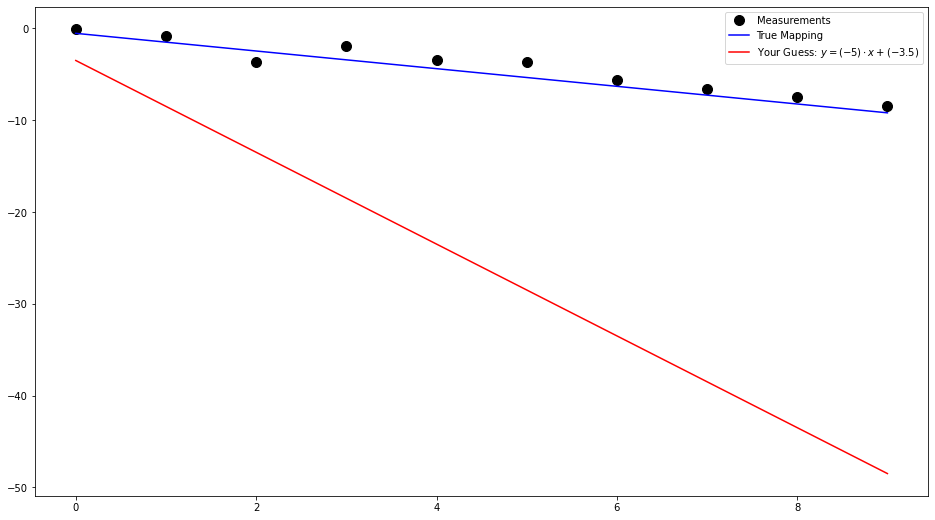

In [ ]:
plot_guess(SLOPE=YOUR_SLOPE, INTERCEPT=YOUR_INTERCEPT)

**Main take away:** it seems rather difficult to objectively choose the best parameters. Furthermore, what does it even mean to be the "best." In the next lesson, we learn how to define this.

## Exercise #2: Loss and Cost Functions

**Description:** by manually adjusting the slope and intercept, try to pick out the best fitting model using the loss and cost functions.

**Duration:** 5 min

First we import some useful libraries, for those unfamiliar, NumPy is a powerful library for array and matrix computations. If you are unfamiliar with the idea of arrays, think about them as extra powerful lists. Additionally, matplotlib is a library used to create light weight visualizations.

In [ ]:
import numpy as np  # import the NumPy library and assign alias `np`
import matplotlib.pyplot as plt  # import pyplot and assign alias `plt`

This hidden block contains the true slope and intercept of the line. As scientists, often times we don't know the true parametes of, it is our job to estimate them to the best of our ability.

No peaking hehe

In [ ]:
#@title
SLOPE_TRUE = np.random.uniform(-4, 4)
INTERCEPT_TRUE = np.random.uniform(-4, 4)

### Defining Our Data

Here we create some artificial independent data, $x$, and create the true corresponding dependent variables given the true slope and interecept.

However, when we deal with these measurements, often times random errors are present. To emulate this, we corrupt our true $y$ with some random error.

In [ ]:
# Creating our independent measurements
x = np.arange(0, 10, 1)

# Creating our true mapping (dependent data)
y_true = SLOPE_TRUE * x + INTERCEPT_TRUE

# Adding noise to corrupt our measurements
y_err = np.random.uniform(0.5, 1.0, size=x.size)
y = np.random.normal(y_true, y_err)

##### Defining Our Loss and Cost Functions

In [ ]:
def loss_func(GUESS, TARGET):
    """
    Our Squared Error (SE) Loss Function
    """
    return (GUESS - TARGET)**2

def cost_func(LOSSES):
    """
    Our Mean Squared Error (MSE) Cost Function
    """
    return (1 / LOSSES.size) * LOSSES.sum()

### Approximating the Model

In [ ]:
def plot_guess(SLOPE=1, INTERCEPT=1):
    """
    Input your choice of slope and intercept, and observe how the line shifts
    """
    
    # Start the plot, and make it bigger
    fig = plt.figure(figsize=(16,9))
    ax = plt.gca()

    # First plot the measurements
    ax.plot(x, y, 'k.', ms=20, label="Measurements")

    # Next plot the true mapping (where we don't know the slope/intercept)
    ax.plot(x, y_true, 'b', label="True Mapping")

    # Next plot your guess at the mapping
    y_guess = SLOPE * x + INTERCEPT
    ax.plot(x, y_guess, 'r', label=f"Your Guess: $y=({SLOPE}) \cdot x + ({INTERCEPT})$")
    
    # Plot vertical displacement lines
    losses = loss_func(y_guess, y)
    for i in range(len(x)):
        ax.vlines(x=x[i], ymax=y_guess[i], ymin=y[i])
        print(f"Loss[{i}] = {losses[i] : .2f}")

    print(f"Cost({SLOPE}, {INTERCEPT}) = {cost_func(losses)}")

    # Visualize the plot
    plt.legend()
    plt.show()

**Try to adjust the slope and intercept below to make the red line approximate the blue as best as you can!** This time use the loss and cost functions to help you out.

In [ ]:
#@title Use the sliders to select your parameters
YOUR_SLOPE = 1 #@param {type:"slider", min:-5, max:5, step:0.1}
YOUR_INTERCEPT = 1 #@param {type:"slider", min:-5, max:5, step:0.1}

Now run the following cell to see how you did!

Loss[0] =  6.62
Loss[1] =  0.01
Loss[2] =  1.60
Loss[3] =  28.51
Loss[4] =  42.61
Loss[5] =  81.18
Loss[6] =  124.33
Loss[7] =  172.39
Loss[8] =  279.50
Loss[9] =  305.88
Cost(1, 1) = 104.26527786155134


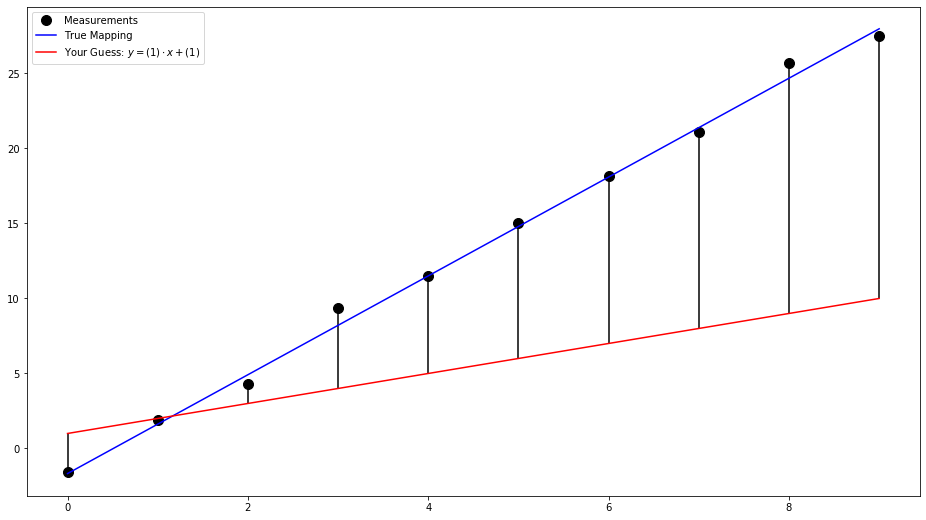

In [ ]:
plot_guess(SLOPE=YOUR_SLOPE, INTERCEPT=YOUR_INTERCEPT)

**Main take away:** Hmm that was much easier! If only there was a way to automate that so you don't have to do that manually...

## Exercise #3: Optimization with SciPy

**Description:** use scipy to find the optimal parameters! We will compare the performance of two different optimization techniques, brute force and something more elegant (and hopefully faster).

**Duration:** 5 min

First we import some useful libraries, for those unfamiliar, NumPy is a powerful library for array and matrix computations. If you are unfamiliar with the idea of arrays, think about them as extra powerful lists. Additionally, matplotlib is a library used to create light weight visualizations.

This time, we also import the `Scipy.optimize` library, which contains a lot of useful functions for optimization.

In [ ]:
import numpy as np  # import the NumPy library and assign alias `np`
import matplotlib.pyplot as plt  # import pyplot and assign alias `plt`
from scipy.optimize import minimize  # import the minimize function
from scipy.optimize import brute  # import the brute function

This hidden block contains the true slope and intercept of the line. As scientists, often times we don't know the true parametes of, it is our job to estimate them to the best of our ability.

No peaking hehe

In [ ]:
#@title
SLOPE_TRUE = np.random.uniform(-4, 4)
INTERCEPT_TRUE = np.random.uniform(-4, 4)

### Defining Our Data

Here we create some artificial independent data, $x$, and create the true corresponding dependent variables given the true slope and interecept.

However, when we deal with these measurements, often times random errors are present. To emulate this, we corrupt our true $y$ with some random error.

In [ ]:
# Creating our independent measurements
x = np.arange(0, 10, 1)

# Creating our true mapping (dependent data)
y_true = SLOPE_TRUE * x + INTERCEPT_TRUE

# Adding noise to corrupt our measurements
y_err = np.random.uniform(0.5, 1.0, size=x.size)
y = np.random.normal(y_true, y_err)

##### Defining Our Loss and Cost Functions

Here we combine the two functions from the previous lesson, and introduce the pars parameter, which resembles our guess at the slope and intercept.

This format is required for the `scipy.optimize`.

In [ ]:
def cost_func(pars, x, y):
    """
    Our Mean Squared Error (MSE) Cost Function
    """
    model_guess = pars[0] * x + pars[1]
    losses = (model_guess - y)**2
    return (1 / losses.size) * losses.sum()

### Optimizing Our Paramters

#### Brute Grid Search

The first method we are going to look at is the brute force method, which is provided to us by `SciPy.optimize.brute`. This method is the most intuitive, however incredibly slow when you have many parameters to inspect.

Brute describes a method where you inspect a grid of parameters, then retrospectively look where the function was minimzed. In the following example, we will be looking at a parameter space of -10 to 10 in steps of 0.1 (for both the slope and intercept), which equates to a dimensionality of 40000 (200 * 200).

In [ ]:
result_brute = brute(cost_func, args=(x,y), ranges=((-10, 10, 0.1), (-10, 10, 0.1)))

print(f"Result from Brute: {result_brute}")

Result from Brute: [-3.00383644 -3.14684141]


#### Minimize with BFGS

Now, we will use `scipy.minimize` to fit our parameters. This function allows you to use differnt optimization techniques which have a variety of use cases and performances. Going through each of these methods is beyond the scope of this lesson, but if you are interested, here are all the methods in `minimize`:

- ‘Nelder-Mead’
- ‘Powell’
- ‘CG’
- ‘BFGS’
- ‘Newton-CG’
- ‘L-BFGS-B’
- ‘TNC’
- ‘COBYLA’
- ‘SLSQP’
- ‘trust-constr’
- ‘dogleg’
- ‘trust-ncg’
- ‘trust-exact’
- ‘trust-krylov’

To see how these work, check out the docs [HERE](https://docs.scipy.org/doc/scipy/reference/optimize.html)

In [ ]:
x0 = [1., 1.]

result_minimize = minimize(cost_func, x0=x0, args=(x,y), method="BFGS")

print(f"Result from minimize: {result_minimize}")

Result from minimize:       fun: 0.20664678505448167
 hess_inv: array([[ 0.06054793, -0.27282474],
       [-0.27282474,  1.72710927]])
      jac: array([-5.17256558e-06, -8.84756446e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-3.00384223, -3.14681328])


As we can see, the results are comparable, let's see how they look!

In [ ]:
def plot_guess(SLOPE=1, INTERCEPT=1):
    """
    Input your choice of slope and intercept, and observe how the line shifts
    """
    
    # Start the plot, and make it bigger
    fig = plt.figure(figsize=(16,9))
    ax = plt.gca()

    # First plot the measurements
    ax.plot(x, y, 'k.', ms=20, label="Measurements")

    # Next plot the true mapping (where we don't know the slope/intercept)
    ax.plot(x, y_true, 'b', label="True Mapping")

    # Next plot your guess at the mapping
    y_guess = SLOPE * x + INTERCEPT
    ax.plot(x, y_guess, 'r', label=f"Your Guess: $y=({SLOPE}) \cdot x + ({INTERCEPT})$")
    
    # Plot vertical displacement lines
    for i in range(len(x)):
        ax.vlines(x=x[i], ymax=y_guess[i], ymin=y[i])

    # Visualize the plot
    plt.legend()
    plt.show()

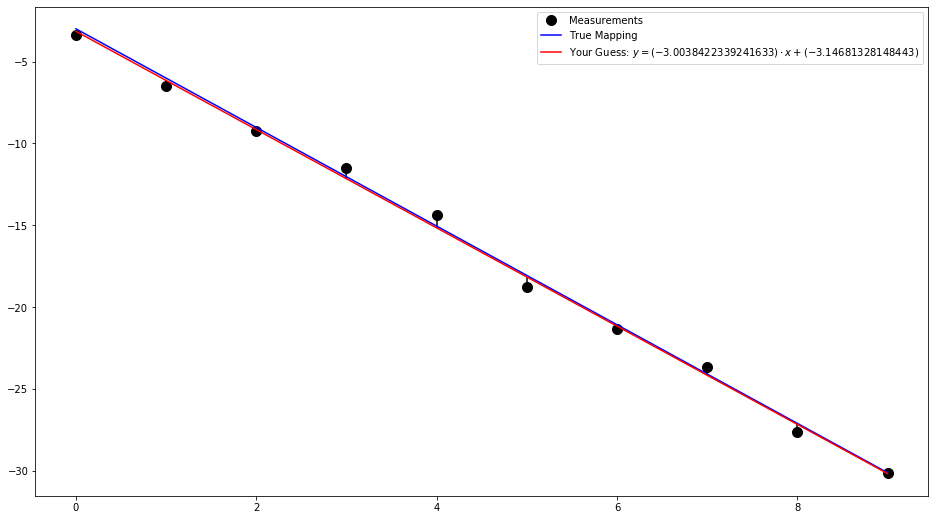

In [ ]:
plot_guess(*result_minimize.x)

**Main take away:** Wow, that looks pretty great!

## Exercise #4: The Perceptron

**Description:** In this exercise, you will use a perceptron to classify different colored dots on a canvas, and observe how adjusting various parameters influence the learning.

**Duration:** 15 min

Instead of writing the algoritm from scratch, we will use a premade model from `sklearn`, which is a popular machine learning framework.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

plt.style.use("ggplot")

## Generating The Data

Here we define the "true decision boundary." Lets say any points _above_ this hypothetical line are considered **class "1"**, and those _below_ are **class "0"**.

In the block below, we define a line of the form $y=m x + b$, where the particular slope, $m$, and intercept $b$ were chosen ad hoc. However, feel free to adjust this slope and intercept. _Note_ the canvas in this exercise is bounded to \[-1,1\] in the horizontal and vertical direction, so be cautious on your of parameters.

In [ ]:
def f(x, SLOPE=0.3, INTERCEPT=-0.2):
    return SLOPE * x + INTERCEPT

Now we will generate 100 data points with a random ($x_0$, $x_1$) coordinate on a cartesian plane, and assign that array to `X`. Then we will generate the labels as mentioned previously, and store them as `y`.

_Note_, I know the notation can get confusing. In the field, we reference input vectors to be "X" and targets to be "y", which is not to be confused with cartesian (x, y) coordinate.

In [ ]:
N = 100
X = np.random.uniform(-1, 1, size=(N, 2))

# Creating the labels
y = np.ones(N)
y[X[:, 1] < f(X[:, 0])] = 0

Let's plot these data points and see how they look.

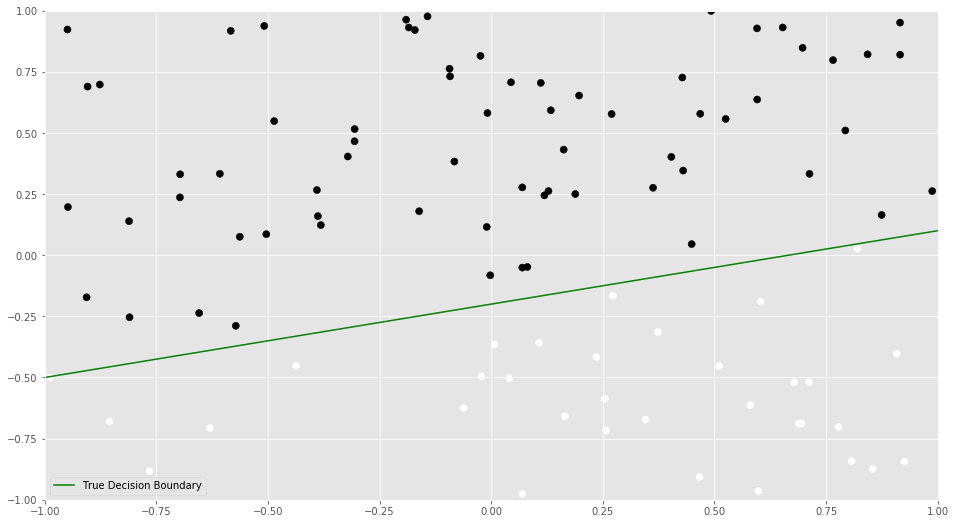

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.binary)
ax.plot(np.arange(-1.5, 1.5, 0.1), f(np.arange(-1.5, 1.5, 0.1)), 'g', label="True Decision Boundary")

ax.legend();
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

## Training

To use the `Peceptron` or any machine learning classifier in `sklearn`, you first start off by initiallizing the classifer and specifiy some hyperparameters. In this example, I am only adjusting the `max_iter` parameter.

Then, you tell the classifer to "fit" your data. This starts the training process.

In [ ]:
clf = Perceptron(max_iter=1)

clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

## Visualizing Results

To visualize this we are going to create a contour plot, to do this we first create a mesh of points using numpy meshgrid, take a look at how it works [HERE](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html).

In [ ]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Now, we will use the `sklearn` framework to "predict," how the different points on our mesh should be categoriezed based on what it learned in training.

In [ ]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)  # Reshaping the vector to match how matplotlib needs it

Here we put it all together and see how well the perceptron did with the parameters specified.

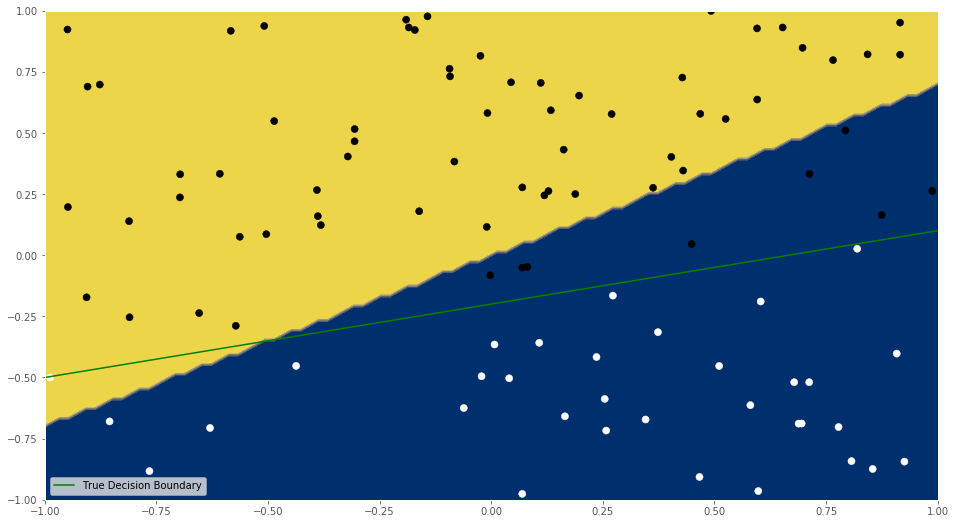

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = plt.gca()

# Plot the contour
ax.contourf(xx, yy, Z, cmap=plt.cm.cividis)

# Plot the training points
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap=plt.cm.binary)

# Plot the true decision boundary
ax.plot(np.arange(-1.5, 1.5, 0.1), f(np.arange(-1.5, 1.5, 0.1)), 'g', label="True Decision Boundary")

ax.legend()

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

Additionally, we can visualize the results in a confusion matrix which communicates how accurately the model did (i.e. any possible mis-labelings).

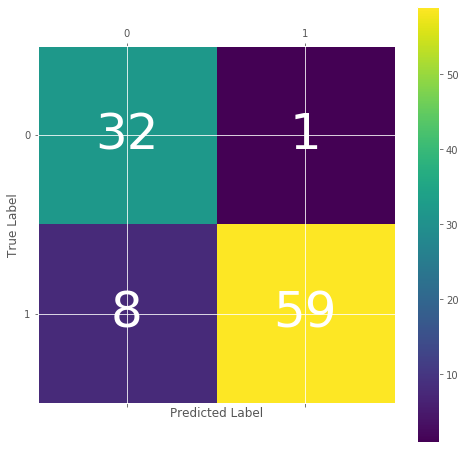

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, clf.predict(X))

fig = plt.figure(figsize=(8, 8))
ax = plt.gca()

cax = ax.matshow(cm)
fig.colorbar(cax)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j], 
                       ha="center", va="center", 
                       color="w", size=50)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

## Your Task

Due to the random number generation, maybe your particular model did perfectly, maybe it did not! Let us conduct some experiments with model parameters.

Adjust the number of data points, `N`, and play around with the various hyperparameters in the Perceptron. Click [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to see the docs and see all parameters you can adjust. 

I'd suggest looking at the following parameters:
- `tol`
- `penalty`
- `alpha`
- `max_iter`
- `eta0`

Discuss your findings.

**Main take away:** Get familiar with the `sklearn` framework and experiment with how various parameters impact model performance.

## Exercise #5: Classifying Handwritting

**Description:** Utilize logistic regression to distinguish numbers from handwritten digits. Here you will see for yourself the ideal layout of a data science project.

**Duration:** 30 min

Instead of writing the logistic regression algoritm from scratch, we will again use a model from `sklearn`. This time we will also demonstrate the _almost_ complete work flow for training a model.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Retrieving the Data

This example is so common that `sklearn` provides a piece of this dataset inside of the library for you to train against. To access it, any many other data sets, we use `sklearn.datasets`.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

Now that we loaded in the data, we can inspect it to see what we have to work with.

First, we will show how many images there are, and the dimensionality of each. Then, we will show the number of labels in the data set.

In [ ]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print(f"Image Data Shape: {digits.data.shape}")
# Print to show there are 1797 labels (integers from 0–9)
print(f"Label Data Shape {digits.target.shape}")

Image Data Shape: (1797, 64)
Label Data Shape (1797,)


In [ ]:
digits.data[0].reshape((8,8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### Visualizing the Images and the Labels

Here we will inspect the images and labels to see what they look like. It usually helps to visualize your data to see what you are working with.

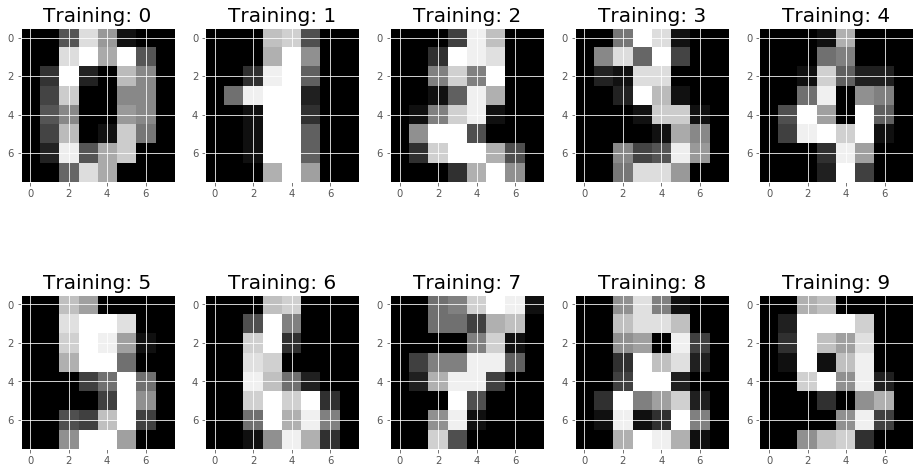

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(16, 9))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    _ax = ax.flatten()[index]
    _ax.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    _ax.set_title(f"Training: {label}", fontsize = 20)

## Splitting the Data into Training and Testing Sets

We make training and test sets to make sure that after we train our classification algorithm, it is able to generalize well to new data.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5)

## Define Hyperparameters and Models to Optimize

Here is where we select which classifier model we would like to use as well as the hyperparameters needed to optimize. In this example, I will **not** show you the hyperparameter optimization at this time, but you will have the opportunity to come back to this step!

In [ ]:
from sklearn.linear_model import LogisticRegression

# Specifying no hyperparameters in this example
clf = LogisticRegression()

To start the training process, we say tell the model to fit our training data.

In [ ]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluating Model Performance

Now we will predict labels for new data (new images), unseen by the classifier to see how well it generalizes. The `.predict` uses the information the model learned during the model training process.

As an example, here we can predict a single image.

In [ ]:
clf.predict(x_test[0].reshape(1,-1))

array([0])

Or we can predict multiple images at once.

In [ ]:
clf.predict(x_test[0:10])

array([0, 3, 3, 1, 9, 5, 8, 2, 1, 6])

So, let us record the predictions for the entire testing set.

In [ ]:
predictions = clf.predict(x_test)

### Quantifying and Visualizing the Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), we are going to keep this simple and use accuracy as our metric. 

To do this are going to see how the model performs on the new data (test set)
accuracy is defined as:
$$\text{fraction of correct predictions}: \frac{\text{correct predictions}}{\text{total number of data points}}$$


In [ ]:
score = clf.score(x_test, y_test)
print(f"Accuracy: {score:.2%}")

Accuracy: 95.33%


As we have done with the simple perceptron, lets make a confusion matrix to see where the model messed up.

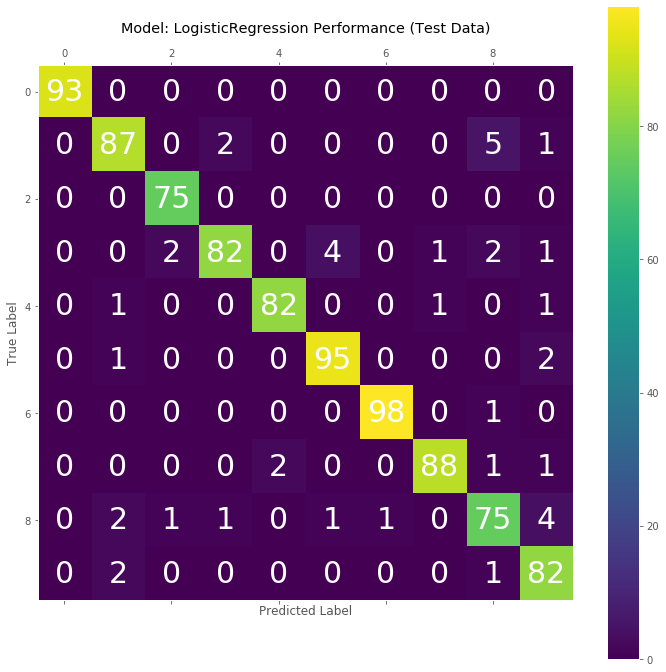

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)

fig = plt.figure(figsize=(12, 12))
ax = plt.gca()

cax = ax.matshow(cm)
fig.colorbar(cax)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j, i, cm[i, j], 
                       ha="center", va="center", 
                       color="w", size=30)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title(f"Model: {type(clf).__name__} Performance (Test Data)")
plt.grid()

plt.show()

## Your Task

And that is basically it! In relatively few lines of code, we were able to build a classifier to automatically detect handwritting--you gotta admit that is pretty cool! Now here are some ways for you to make it better,

1. Fine tune some hyperparameters. I'd suggest looking into the GridSearchCV function [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to see how it can be done.
2. For the sake of clarity, the "CV" in `GridSearchCV` stands for cross validation which is a useful technique to prevent overfitting. Look into this concept and try to understand it. Let me know if you need help!
4. How does changing the `test_size` parameter in `train_test_split()` affect model performance.
3. Try to redo this entire process with another classifier. To do this, you would only need to change two lines of code. For inspiration, see [HERE](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) to see some classifiers you have access too.

**Main take away:** Get familiar with the `sklearn` framework, the whole training process, and training a classifier to recognize handwritten digits.

## Exercise #6: Do it Again, all by Yourself!

**Description:** Utilize your choice of model to distinguish different types of flowers from crude measurements.

**Duration:** As long as you need.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## Retrieving the Data

This example is so common that `sklearn` provides a piece of this dataset inside of the library for you to train against. To access it, any many other data sets, we use `sklearn.datasets`.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
print(f"Types of Flowers:  {iris.target_names}")

To see what's in the iris dataset, create some visuals, display some metrics, and take a look at the docs [HERE](https://scikit-learn.org/stable/datasets/index.html#iris-plants-dataset).


This was just to get you started, you have everything you need to take it from here!

_Optional_: Also look into data preprocessing and compare the impact on performance, if any. Starting [HERE](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is a good idea.

**Main take away:** Get familiar with the `sklearn` framework, the whole training process, and training a classifier to recognize flowers.

